# Exploratory Data Analysis (EDA) on the downloaded and cleaned data

## 1. Libraries import and variables definition

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## 2. Load the data

In [2]:
assets = pd.read_feather('./src_zip/assets.ftr')
cand = pd.read_feather('./src_zip/cand.ftr')
hired = pd.read_feather('./src_zip/hired_ex.ftr')
sett = pd.read_feather('./src_zip/settl_ex.ftr')
rev = pd.read_feather('./src_zip/revenue.ftr')
other_rev = pd.read_feather('./src_zip/other_rev.ftr')

## 3. Analysis on the candidates own assets

,SQ_CANDIDATO,VR_BEM_CANDIDATO
count,9.327100e+04,9.327100e+04
mean,1.590259e+11,2.572914e+05
std,7.125576e+10,6.875363e+06
min,1.000060e+10,0.000000e+00
25%,1.000006e+11,8.301735e+03
50%,1.600006e+11,3.700000e+04
75%,2.200006e+11,1.220337e+05
max,2.800006e+11,1.000000e+09


In [49]:
total_assets_by_cand = assets.groupby(['SQ_CANDIDATO']).sum().sort_values(by='VR_BEM_CANDIDATO', ascending=False)
(total_assets_by_cand['VR_BEM_CANDIDATO'] * (10**-6)).describe()

count    17614.000000
mean         1.362429
std         19.208773
min          0.000000
25%          0.060000
50%          0.227498
75%          0.650000
max       1202.006700
Name: VR_BEM_CANDIDATO, dtype: float64

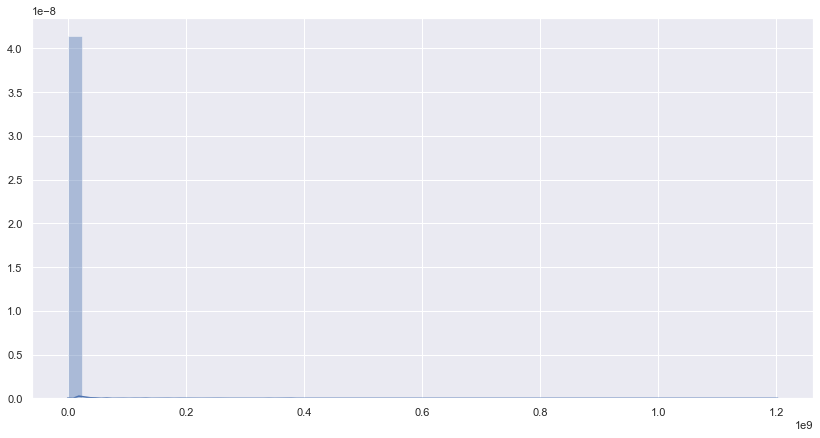

In [42]:
sns.set(rc={'figure.figsize' : (14,7)})
p = sns.distplot(total_assets_by_cand.VR_BEM_CANDIDATO.values) 

In [58]:
asset_values = total_assets_by_cand['VR_BEM_CANDIDATO'].values
mu = np.median(asset_values)
sd = np.std(asset_values)
fd = [e for e in asset_values if (mu - 0.5 * sd < e < mu + 0.5 * sd)]

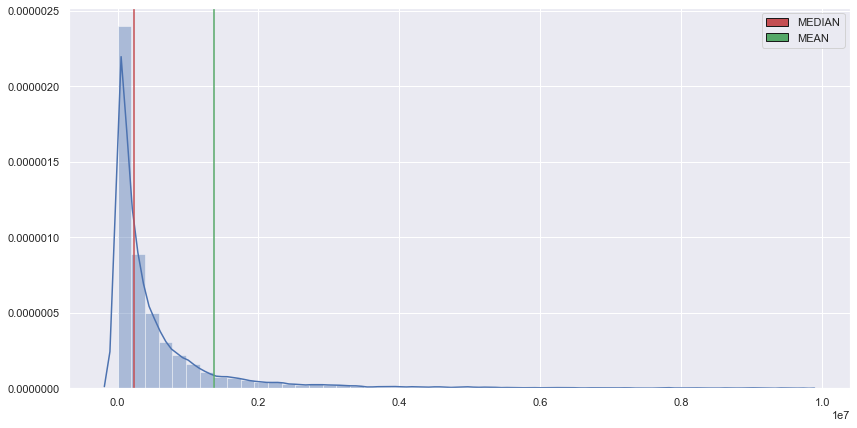

In [68]:
p = sns.distplot(fd) 
plt.axvline(np.median(asset_values), color='r')
plt.axvline(np.mean(asset_values), color='g')

#create legend
from matplotlib.patches import Rectangle
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['r','g']]
labels= ["MEDIAN", "MEAN"]
plt.legend(handles, labels)
plt.show()

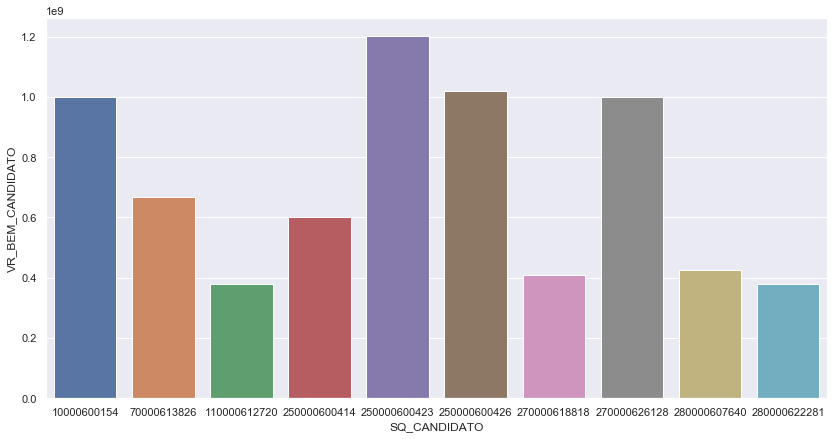

In [76]:
ax = sns.barplot(x="SQ_CANDIDATO", y="VR_BEM_CANDIDATO", data=total_assets_by_cand.head(10).sort_index().reset_index())